# [How to control graph recursion limit](https://langchain-ai.github.io/langgraph/how-tos/recursion-limit/)

## Define the graph

In [18]:
import operator
from typing import Annotated, Any
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    # The operator.add reducer fn makes this append-only
    aggregate: Annotated[list, operator.add]

def node_a(state):
    return {"aggregate": ["I'm A"]}

def node_b(state):
    return {"aggregate": ["I'm B"]}

def node_c(state):
    return {"aggregate": ["I'm C"]}

def node_d(state):
    return {"aggregate": ["I'm A"]}


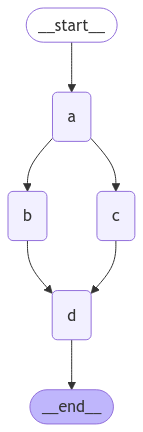

In [19]:
builder = StateGraph(State)

builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)
builder.add_node("d", node_d)

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
from langgraph.errors import GraphRecursionError

try:
    graph.invoke({"aggregate": []}, {"recursion_limit": 3})
except GraphRecursionError:
    print("Recursion Error")

Recursion Error


In [21]:
try:
    graph.invoke({"aggregate": []}, {"recursion_limit": 4})
except GraphRecursionError:
    print("Recursion Error")